# Assessment Project

**Author:** Mark Cotter
**Email:**  g00376335@gmit.ie

This is my Project jupyter notebook for the GMIT module Machine Learning and Statistics.

***

#### Project Plan

* Load the the dataset into the jupyter notebook
* Undertake initial review of the dataset
* Look through the data using sorts and plots to get a feel for the data content
* Clean the dataset removing any erroneous or duplicate data that might skew a model trained on the dataset
* Investigate data content
* Review findings of dataset investigation
* Decide what type of the model to fit sigmoid relationship
* Divide the cleaned dataset into training and testing sets using 70%:30% split
* Train a neural network model using the training dataset using Keras [7]
* Test the trained model using the test dataset
* Create python script to run a web service based on the trained model
* Create Dockerfile to build and run the web service in a container

***

#### Import Modules and Dataset

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow.keras as kr
# Set Pyplot settings. Code adapted from https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-colorblind")
plt.rcParams['figure.figsize'] = [14,8]

# Set pd df to display all rows. Code adapted from
# https://stackoverflow.com/a/51593236
#pd.set_option('display.max_rows', 500)

# import text file of csv data as dataframe. Code adapted from 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df = pd.read_csv('powerproduction.txt') 

***

### Initial Review of Dataset

In [2]:
# Describe basic stats of the data
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [3]:
# Display dataframe
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


#### Dataset Scope
The imported dataset file **powerproduction.txt** contains 500 observations with two variables speed and power. The project brief identifies these variables as wind **speed** and wind turbine **power** output. The measurement units of the variables are not mentioned.
Based on range of wind speed values, the speed units appear to be metres/second (m/s) ranging from no wind (0 m/s) to whole gale force (25 m/s) [2].
Based on the range of power outputs, the power units appear to be in Kilowatts (kW) ranging from 0 kW to 113.556 kW [2].

***

#### Plots of Imported Data

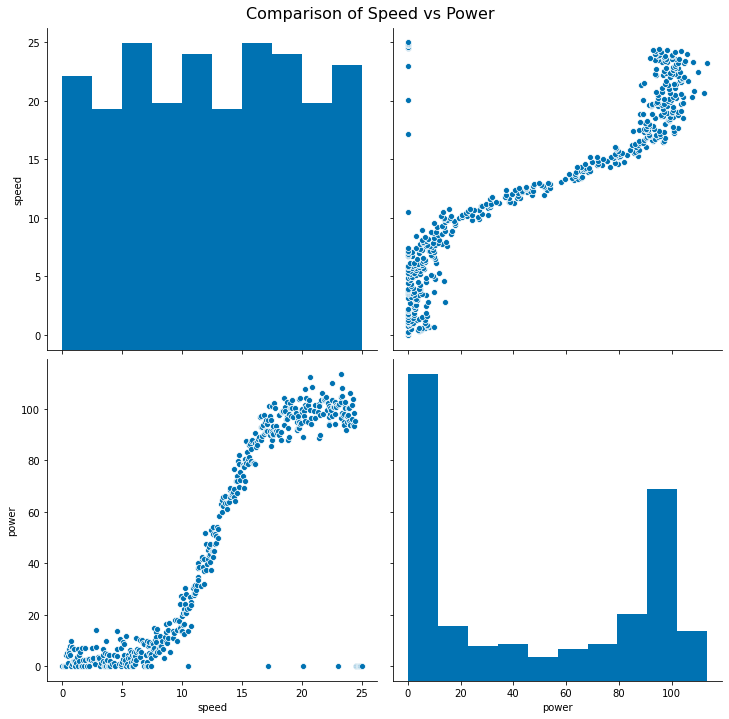

In [4]:
# Plot data comparisons of data. Code adpated from
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
plot = sns.pairplot(df, height=5)
# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.95)
plt.suptitle("Comparison of Speed vs Power", fontsize = 16)
plt.show()

***

#### Sorted Dataset Investigation

In [5]:
# Sort data by speed and display selections at the low and high speeds. Code adapted from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df.sort_values(by=['speed']).head(15)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [6]:
df.sort_values(by=['speed']).tail(15)

,speed,power
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117
490,24.499,0.000
491,24.525,0.000
492,24.575,0.000
493,24.650,0.000
494,24.750,0.000


In [7]:
# Sort data by power and display selections of the low and high power outputs
df.sort_values(by=['power']).head(10)

,speed,power
0,0.000,0.0
111,5.806,0.0
110,5.781,0.0
105,5.556,0.0
89,4.880,0.0
83,4.429,0.0
75,3.879,0.0
74,3.804,0.0
73,3.779,0.0
70,3.679,0.0


In [8]:
df.sort_values(by=['power']).tail(10)

,speed,power
460,23.248,104.655
465,23.373,104.977
481,24.024,105.992
431,21.672,106.208
410,20.295,107.584
464,23.348,108.167
420,20.871,108.485
447,22.497,109.932
416,20.646,112.362
461,23.273,113.556


In [9]:
# Display data points with 0.000 kW power and sort by speed
df.loc[(df['power'] == 0.000)].sort_values(by=['speed'])

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


***

#### Sorted Dataset Review
There appears to be a few outlier dataset observations with 0.000 kW power values. These observations are mostly in the low wind speed observations, but also include a few medium and high wind speeds observations.

The data shows that power outputs are 0.000 kW for the ten observations with speed greater or equal to 24.499 m/s. This speed is considered to be a "whole gale" force on the Beaufort scale that can uprooted trees and cause considerable damage to buildings [2]. This suggests that power generation is stopped for safety reasons when the wind speed is too high (approaching 25 m/s) to avoid damaging the wind turbine [3]. The few random medium speed observations with 0.000 kw power output appear to be related to when the turbine is shut down for operational and maintenance purposes [2].

For analytic modeling purposes, these erroneous 0.000 kW power data points should be omitted from the dataset, as they do not appear to follow the natural relationship between wind speed and turbine power output [5].

***

### Dataset Cleansing  - Stage 1

In [10]:
# Remove outlier observations rows where power == 0.000
df = df.loc[(df['power'] > 0.0)]

***

#### Dataset Cleansing  - Stage 1 Summary

In [11]:
# Descibe updated basic stats of the dataset
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


***

#### Check for duplicate data observations

In [12]:
# Count remaining unique data observation. Code adapted from https://pyformat.info/ &
# https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
print("The number of unique speed value observations is {:}".format(len(df.speed.unique())))
print("The number of unique power value observations is {:}".format(len(df.power.unique())))

The number of unique speed value observations is 451
The number of unique power value observations is 450


#### Duplicate observations found

In [13]:
# Display duplicate power observation found
# Code adapted from https://stackoverflow.com/a/54050797
df[df[['power']].duplicated() == True]

,speed,power
357,17.843,91.27


In [14]:
# Print duplicate power observations found
df.loc[(df['power'] == 91.27)]

,speed,power
338,17.117,91.27
357,17.843,91.27


In [15]:
# Check wind speed observation that give power output between 90.0 kW and 93.0 kW.
# and sort by power values. Code adapted from https://stackoverflow.com/a/41281750
df.loc[(df['power'] > 90.0) & (df['power'] < 93.0)].sort_values(by=['power'])

,speed,power
352,17.593,90.142
330,16.792,90.171
317,16.091,90.412
350,17.543,90.435
358,17.893,90.546
363,18.268,90.751
332,16.917,90.761
348,17.492,91.125
344,17.367,91.206
357,17.843,91.270


#### Review of duplicate observations

The two wind speeds that have observed duplicate power output of 91.27 kW are of similar scale (17.117 and 17.843). Other  similar power output observations have similar variations in wind speed. Wind always fluctuates and can never be measured exactly [6]. As such it does not appear matter which of the duplicate observations should be retained or removed.

I decided to retain the first observation (index 338) and drop the second duplicate observation (index 357).
***

### Dataset Cleansing  - Stage 2

In [16]:
# Drop duplicates values be keep the first value. Code adapted from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
df = df.drop_duplicates(subset=['power'], keep='first')

***

#### Dataset Cleansing  - Stage 2 Summary

In [17]:
# Decribed the
df.describe()

,speed,power
count,450.000000,450.000000
mean,12.993549,53.146716
std,6.839768,40.527327
min,0.325000,0.067000
25%,7.325750,8.507250
50%,13.013000,56.123500
75%,18.787750,94.752750
max,24.399000,113.556000


After cleaning the data [5], 450 of the original 500 dataset observations remain.

***

### Investigate Dataset content

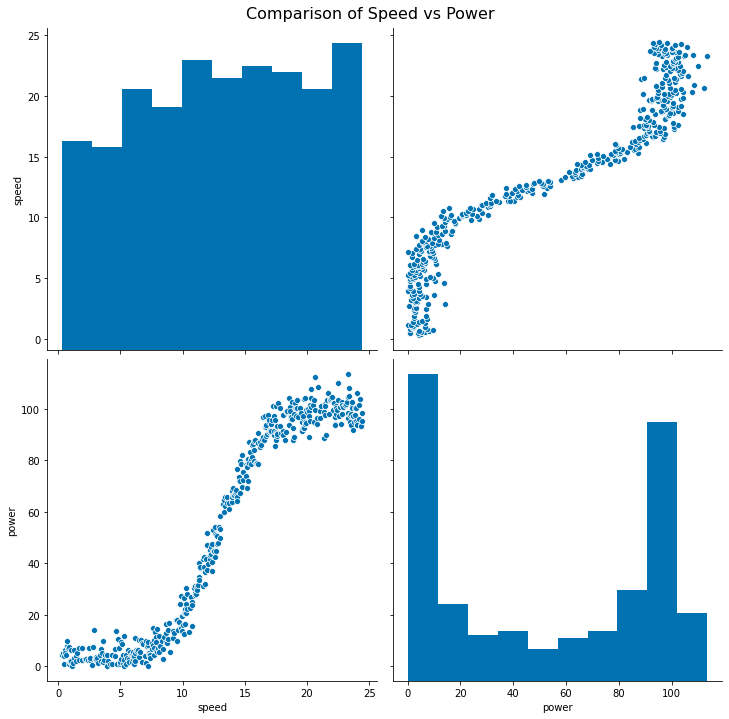

In [18]:
# Replot data comparison 
plot = sns.pairplot(df, height=5)
# Add Title 
plt.subplots_adjust(top=0.95)
plt.suptitle("Comparison of Speed vs Power", fontsize = 16)
plt.show()

***

#### Descriptions of wind speed observation ranges

In [19]:
# Describe low wind speed data points
low_speed = df.loc[(df['speed'] <= 8.0)]
low_speed.describe()

,speed,power
count,128.000000,128.000000
mean,4.394070,5.037539
std,2.373902,3.417678
min,0.325000,0.067000
25%,2.458250,2.282750
50%,4.842500,4.397500
75%,6.368500,7.051000
max,7.933000,14.788000


In [20]:
# Describe medium wind speed data points.
med_speed = df.loc[(df['speed'] > 8.0) & (df['speed'] < 18.0)]
med_speed.describe()

,speed,power
count,193.000000,193.000000
mean,13.184679,54.665192
std,2.854722,29.720274
min,8.033000,3.000000
25%,10.736000,27.688000
50%,12.988000,54.079000
75%,15.666000,82.147000
max,17.893000,102.322000


In [21]:
# Describe high wind speed data points
high_speed = df.loc[(df['speed'] >= 18.0)]
high_speed.describe()

,speed,power
count,129.000000,129.000000
mean,21.240411,98.611124
std,1.933977,4.877992
min,18.043000,87.980000
25%,19.620000,95.012000
50%,21.321000,98.790000
75%,23.023000,101.419000
max,24.399000,113.556000


In [22]:
# Count low medium and high wind speed ranges. Code adpated from
# https://www.kite.com/python/answers/how-to-count-the-number-of-rows-in-a-pandas-dataframe-in-python
df_cnt = len(df.index)
low_s_cnt = len(low_speed.index)
med_s_cnt = len(med_speed.index)
high_s_cnt = len(high_speed.index)

# Print % of low medium and high wind speed ranges.
# Code adpated from https://pyformat.info/
print("The percentage of observations in low, medium and high wind speed data observations are as follow")
print("Low speed range: 0 to 8 m/s = {:.1f}%".format((low_s_cnt/df_cnt)*100))
print("Medium speed range: 8 to 18 m/s = {:.1f}%".format((med_s_cnt/df_cnt)*100))
print("High speed range: 18 to 24.5 m/s = {:.1f}%".format((high_s_cnt/df_cnt)*100))

The percentage of observations in low, medium and high wind speed data observations are as follow
Low speed range: 0 to 8 m/s = 28.4%
Medium speed range: 8 to 18 m/s = 42.9%
High speed range: 18 to 24.5 m/s = 28.7%


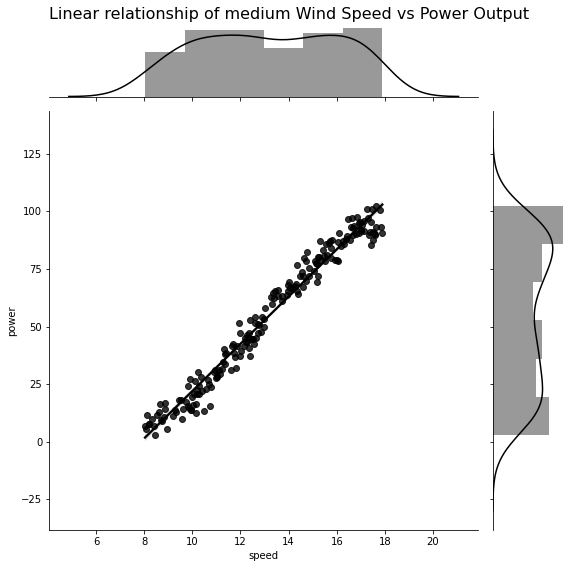

In [23]:
# Plot comparasion of medium wind speed versus power output
# Code adapted from https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions 
# and https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
plot = sns.jointplot(x="speed", y="power", kind="reg", color="k", height=8, data=med_speed)

# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.95)
plt.suptitle("Linear relationship of medium Wind Speed vs Power Output", fontsize = 16)
# Display plot
plt.show()

***

#### Descriptions of power output observation ranges

In [24]:
# Describe low power output data points
df.loc[(df['power'] <= 20.0)].describe()

,speed,power
count,163.000000,163.000000
mean,5.422319,6.608110
std,2.903238,4.663313
min,0.325000,0.067000
25%,3.040500,2.852500
50%,5.706000,5.553000
75%,7.770500,9.632500
max,10.736000,19.354000


In [25]:
# Describe medium power output data points
df.loc[(df['power'] > 20.0) & (df['power'] < 85.0)].describe()

,speed,power
count,112.000000,112.000000
mean,12.922268,52.661384
std,1.731987,19.401972
min,9.810000,20.636000
25%,11.555500,37.066000
50%,12.725500,51.310000
75%,14.414000,69.242000
max,16.041000,84.133000


In [26]:
# Describe high power output data points
df.loc[(df['power'] > 85.0)].describe()

,speed,power
count,175.000000,175.000000
mean,20.091229,96.804714
std,2.567013,5.646087
min,15.315000,85.173000
25%,17.805500,92.875000
50%,19.895000,97.148000
75%,22.384500,100.698500
max,24.399000,113.556000


***

### Findings of Dataset Investigation

After the 0.000 kW power outliers are removed, the dataset appears to give a very well defined S-shaped speed to power relationship curve, which also known as a Sigmoid function curve [1, 8]. For most wind turbines, the cut-in speed is 3 to 4 m/s and the cut-out speed is 25 m/s [4]. Based on the available data for this turbine and my initial review above, I note the following:

* Wind speed needs to be greater than 0.3 m/s to generate any power
* Up to wind speed of 8 m/s (28% of the data observations), only limited power (mean of 5 kW) can be generated. The lower power is likely due to friction and resistance losses that the wind turbine need to overcome.
* During medium wind speeds of between 8 m/s and 18 m/s (43% of the data observations), the turbine starts to generate power directly proportional to the wind speed.
* After the wind speed reaches approximately 18 m/s (29% of the data observations), the power output plateaus at a mean power of 100 kW, which appear to be the maximum power output of the wind turbine.
* The turbine appears is shut down and stops generating power when wind speed reaches approximately 24.5 m/s.
* The wind speed data value range is almost uniformly distributed.
* The power output data has a greater distribution at the low and high power output ranges.  

***

### Neural Network Model of Dataset

The relationship between wind speed and power output can be modelled based either on a logistic approximation or a Weibull cumulative distribution function [1, 9].

#### Logistic Curve
[https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Logistic_cdf.svg/1024px-Logistic_cdf.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Logistic_cdf.svg/1024px-Logistic_cdf.svg.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Logistic_cdf.svg/1024px-Logistic_cdf.svg.png)

In [34]:
# Normalise the data for use in a Neural network
dfN = df.copy()
dfN['speed'] = dfN['speed']/25
dfN['power'] = dfN['power']/100

# Divide the data into training and testing sets. Code adapted from
# https://www.geeksforgeeks.org/divide-a-pandas-dataframe-randomly-in-a-given-ratio/
# Creating a training dataframe with 70% ratio of
train = dfN.sample(frac = 0.7)
  
# Creating testing dataframe with rest of the 30% values 
test = dfN.drop(train.index)

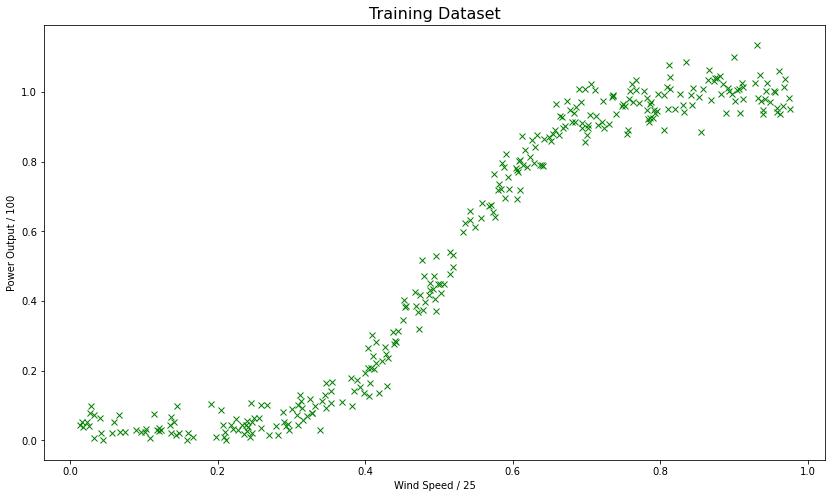

In [37]:
plt.plot(train['speed'], train['power'], 'gx')
plt.title("Training Dataset", fontsize = 16)
plt.xlabel("Wind Speed / 25")
plt.ylabel("Power Output / 100");

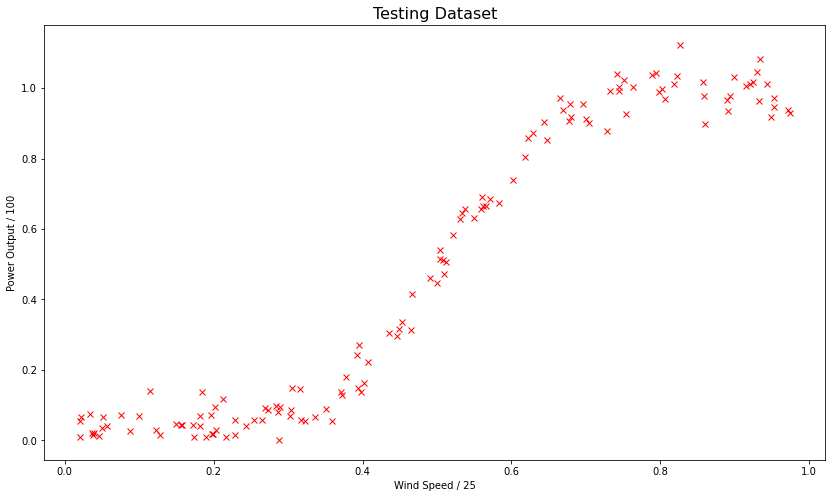

In [38]:
plt.plot(test['speed'], test['power'], 'rx')
plt.title("Testing Dataset", fontsize = 16)
plt.xlabel("Wind Speed / 25")
plt.ylabel("Power Output / 100");

### Reference

[1] How effectively a Sigmoid function curve can be fitted with a scaled Weibull Cumulative Distribution Function (CDF)?; Dr. Neeraj Dhanraj Bokde - Aarhus University, Denmark; https://towardsdatascience.com/how-effectively-a-sigmoid-function-curve-can-be-fitted-with-a-scaled-weibull-cumulative-6f3a3dd7f19f

[2] Beaufort Wind Scale; Dr. Neal Pettigrew - The University of Maine; http://gyre.umeoce.maine.edu/data/gomoos/buoy/php/variable_description.php?variable=wind_2_speed

[3] Wind energy's frequently asked questions (FAQ) - How efficient are wind turbines? & Why do some of the turbines in a wind farm sometimes stand still? & How is electricity measured?; EWEA; https://www.ewea.org/wind-energy-basics/faq/#:~:text=The%20output%20of%20a%20wind,average%20EU%20households%20with%20electricity.

[4] Power control - Wind turbine design; Wikipedia; https://en.wikipedia.org/wiki/Wind_turbine_design

[5] Data cleaning; The benefits and steps to creating and using clean data; Tableau Software, Seattle, USA; https://www.tableau.com/learn/articles/what-is-data-cleaning

[6] TURBINE OPERATION/ENERGY OUTPUT; Kees van Kuijen - TU Delft, Netherlands; http://mstudioblackboard.tudelft.nl/duwind/Wind%20energy%20online%20reader/Static_pages/power_curve.htm

[7] Keras; https://keras.io/

[8] Signmoid function; Wikipedia; https://en.wikipedia.org/wiki/Sigmoid_function

[9] Comparison of logistic functions for modeling wind turbine power curves; Daniel Villanueva & Andrés Feijóo - Universidade de Vigo, Spain; https://www.sciencedirect.com/science/article/pii/S0378779617304340